The 1d scalar wave euqation with Mur ABC (Absorbing Boudary Condition) has the following form:
\begin{equation}
\begin{split}
&u_{tt} - c^2(x)u_{xx} = f(x, t), a < x < b, t > 0 \\
&u_t(a, t) - c(a)u_x(a, t) = 0\\
&u_t(b, t) + c(b)u_x(b, t) = 0\\
&u(x, 0) = 0\\
&u_t(x, 0)  = 0 
\end{split}
\end{equation}

We solve it with FD method
$$ u^{n+1}_i - 2u^n_i + u^{n-1}_{i} = \left(c_i\frac{dt}{dx}\right)^2\left(u^n_{i+1} - 2u^n_i + u^n_{i-1}\right) + dt^2f^n_i$$
and 
\begin{equation}
\begin{split}
u^{n+1}_0 = c_0\frac{dt}{dx}\left(u^n_1 - u^n_0\right) + u^n_0\\
u^{n+1}_{n_x} = -c_{n_x}\frac{dt}{dx}\left(u^n_{n_x} - u^n_{n_x-1}\right) + u^n_{n_x}
\end{split}
\end{equation}

In [37]:
import numpy as np
from matplotlib import pyplot as plt

In [61]:
class FDSolver:
    def __init__(self, h, dt, c, nt, x0, f0):
        self.nx = len(c) - 1
        self.h = h 
        self.dt = dt 
        self.nt = nt
        self.x0 = x0
        self.f0 = f0
        self.c = c
        self.cdt = c * dt 
        
        self.u_next = np.zeros(self.nx + 1)
        self.u_current = np.zeros(self.nx + 1)
        self.u_prev = np.zeros(self.nx + 1)
        self.wavefield = np.zeros((self.nt + 1, self.nx + 1))
        
    def ricker(self, t):
        sigma = 1 / (np.pi * self.f0 * np.sqrt(2))
        t0 = 6 * sigma
        tmp = np.pi**2 * self.f0**2 * (t-t0)**2 
        w = (1 - 2*tmp) * np.exp(-tmp)
        return w
    
    def cfl_number(self):
        cfl = self.c.max() * self.dt / self.h
        num_grid_per_wavelength = int(self.c.min() / (self.f0 * self.h))
        print(f'CFL number is {cfl}, number of grid points in each wavelength is about {num_grid_per_wavelength}')
        
    def abc(self):
        # Left boundary
        self.u_next[0] = self.cdt[0] * (self.u_current[1] - \
                        self.u_current[0]) / h + self.u_current[0]
        # Right boundary
        self.u_next[-1] = -self.cdt[-1] * (self.u_current[-1] - \
                        self.u_current[-2]) / h + self.u_current[-1]
        
    def deriv_xx(self, u):
        duxx = np.zeros_like(u)
        for i in range(1, nx):
            duxx[i] = (u[i+1] - 2 * u[i] + u[i-1]) / h ** 2
        return duxx
        
    def steps(self):
        for n in range(self.nt+1):
            self.wavefield[n] = self.u_next
            t = n * self.dt
            self.u_next = 2 * self.u_current - self.u_prev + self.cdt**2 * self.deriv_xx(self.u_current)
            # u_next[x0] += src(t)
            self.u_next[self.x0] += self.dt**2 * self.ricker(t)
            self.abc()
            self.u_current, self.u_prev = self.u_next, self.u_current

    def plot_wavefield_nt(self, nt):
        u_nt = self.wavefield[nt]
        fig = plt.figure()
        ax = fig.add_subplot()
        ax.plot(u_nt)
        plt.show()
        
    def plot_wavefield(self):
        fig = plt.figure()
        ax = fig.add_subplot()
        im = ax.imshow(self.wavefield, cmap="gray", aspect="auto")
        plt.colorbar(im)
        plt.show()

In [62]:
c = np.ones(201) * 2
nx = 200
h = 0.01
dt = 0.003
nt = 300
x0 = 100
f0 = 10
solver = FDSolver(h, dt, c, nt, x0, f0)
solver.cfl_number()

CFL number is 0.6, number of grid points in each wavelength is about 20


In [63]:
solver.steps()

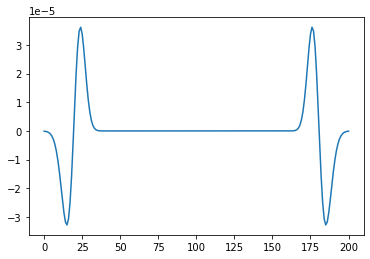

In [64]:
solver.plot_wavefield_nt(180)

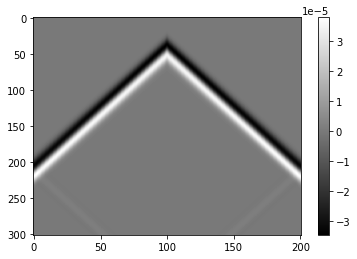

In [65]:
solver.plot_wavefield()